In [159]:
import pandas as pd
import json
import numpy as np
import os

## Prepare

In [160]:
philly=pd.read_csv('philly.csv', encoding='utf-8')

In [161]:
data_path = "data"
reviews_path = "yelp_academic_dataset_review.json"

with open(os.path.join(data_path, reviews_path), "r", encoding="utf-8") as f:
    review_data = [json.loads(line) for line in f]
reviews = pd.DataFrame(review_data)

In [162]:
philly.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [163]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [164]:
# Merge both DataFrames on 'business_id', keeping only matching reviews
filtered_merge= reviews.merge(philly, on="business_id", how="inner",suffixes=("_review", "_business"))

In [165]:
filtered_reviews=filtered_merge.drop(columns=['hours','useful', 'funny', 'cool','latitude', 'longitude','name', 'address', 'city', 'state','postal_code','is_open','attributes','categories',])

In [166]:
filtered_reviews.describe()

,stars_review,stars_business,review_count
count,326073.000000,326073.000000,326073.000000
mean,3.732106,3.722771,510.468591
std,1.344623,0.622311,657.197148
min,1.000000,1.000000,5.000000
25%,3.000000,3.500000,110.000000
50%,4.000000,4.000000,288.000000
75%,5.000000,4.000000,631.000000
max,5.000000,5.000000,3401.000000


In [167]:
#filtered_reviews=filtered_reviews[filtered_reviews['review_count']>=70]

In [168]:
filtered_reviews

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count
0,8JFGBuHMoiNDyfcxuWNtrA,smOvOajNG0lS4Pq7d8g4JQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,Good food--loved the gnocchi with marinara\nth...,2009-10-14 19:57:14,3.5,367
1,_Ju3CNrMGguLD__9UDrMeA,SIYhemrUHeIudhjxVP4K9A,RZtGWDLCAtuipwaZ-UfjmQ,5.0,Excellent food atmosphere and service . Everyt...,2016-03-30 23:45:07,3.5,367
2,QhcJocQzWE5FV8Dp6QTv5Q,27km-ZQwZMMq_Yooq3nSIw,RZtGWDLCAtuipwaZ-UfjmQ,5.0,My boyfriend and I have visited here a bunch o...,2013-10-24 21:06:38,3.5,367
3,goS6BPv_0nDhy89HJ14XkA,L5-vb-2aosPUdDJ_VEb-uA,RZtGWDLCAtuipwaZ-UfjmQ,3.0,Its a decent place. Not the best italian food ...,2014-09-26 19:10:07,3.5,367
4,LkSHYOu6dFkwVnAB0OEWqA,Oi1qbcz2m2SnwUeztGYcnQ,RZtGWDLCAtuipwaZ-UfjmQ,4.0,If the name of my restaurant was my last name ...,2012-03-30 19:55:40,3.5,367
...,...,...,...,...,...,...,...,...
326068,JxdCs2fyP6mvazGdXkIRjA,Gy-yRJpXdSpOVreHocEGWw,K1SsvIPfFcHniNSPc3IG7g,4.0,Pizza was good and they gave a great discount ...,2021-11-22 18:27:36,4.0,16
326069,lqKVnnq3vgIQ1LWo5MszAg,3KkiGGMlWe8eCbb0Wtir_w,K1SsvIPfFcHniNSPc3IG7g,5.0,My order was delicious! I was a bit hesitant s...,2021-08-17 23:14:37,4.0,16
326070,rNckjjKzFbEV6SRCiHJuJQ,XSOdhb9CE747hrmY8cR0NQ,K1SsvIPfFcHniNSPc3IG7g,5.0,Ordered here for the first time. I did a peppe...,2021-10-27 13:55:05,4.0,16
326071,YUbj6EeyNB9VJ24_i3uB-w,WLaCTpXXdrFKlUTXDsp6Tg,K1SsvIPfFcHniNSPc3IG7g,5.0,"When it comes to pizza, the dough is everythin...",2021-05-19 16:19:46,4.0,16


### Remove users/business with low number of reviews

In [169]:
# Sort by date (most recent first) and keep only the latest review per user-business pair
remove_duplicates= filtered_reviews.sort_values(by="date", ascending=False).drop_duplicates(subset=["business_id", "user_id"], keep="first")

# Count the number of reviews per user
user_review_counts = remove_duplicates["user_id"].value_counts()

# Keep only users with at least 10 reviews
valid_users = user_review_counts[user_review_counts >= 10].index

# Filter the DataFrame
corpus_filtered = remove_duplicates[remove_duplicates["user_id"].isin(valid_users)]

In [170]:
corpus_filtered

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,"I REALLY just come for the sushi!! Ha ha, but ...",2022-01-19 18:33:21,4.0,33
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,My boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,"Restaurant week was upon us, so I decided to d...",2022-01-19 16:04:45,2.5,387
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,I told myself I'd stop coming here and remembe...,2022-01-19 14:45:47,3.5,9
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,Love this place. Whenever I come here the staf...,2022-01-19 13:55:12,4.0,119
...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,I would give it 5 stars for the food and 2 for...,2005-09-25 15:53:53,3.5,331
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,Awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,Great breakfast/brunch place near the Italian ...,2005-09-11 23:32:56,4.0,1176
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,My favorite of the Starr restaurants. This is ...,2005-09-06 22:55:47,4.5,17


### Lowecasing

In [171]:
review_lower=corpus_filtered
review_lower["text"]=review_lower["text"].str.lower()
review_lower

/tmp/ipykernel_532953/4012412068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_lower["text"]=review_lower["text"].str.lower()


,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,"i really just come for the sushi!! ha ha, but ...",2022-01-19 18:33:21,4.0,33
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,"restaurant week was upon us, so i decided to d...",2022-01-19 16:04:45,2.5,387
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself i'd stop coming here and remembe...,2022-01-19 14:45:47,3.5,9
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place. whenever i come here the staf...,2022-01-19 13:55:12,4.0,119
...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it 5 stars for the food and 2 for...,2005-09-25 15:53:53,3.5,331
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfast/brunch place near the italian ...,2005-09-11 23:32:56,4.0,1176
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants. this is ...,2005-09-06 22:55:47,4.5,17


In [172]:
corpus=review_lower

### First Cleaning


In [173]:
import string
import re

# Remove newlines, ellipses, and numbers
corpus["text"] = corpus["text"].apply(lambda text: text.replace("\n", "").replace("...", ""))

# Remove punctuation and numbers
corpus["text"] = corpus["text"].apply(lambda text: ''.join([char for char in text if char not in string.punctuation and not char.isdigit()]))

# Alternatively, you can use a regular expression to remove numbers
corpus["text"] = corpus["text"].apply(lambda text: re.sub(r'\d+', '', text))



/tmp/ipykernel_532953/1134474870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["text"] = corpus["text"].apply(lambda text: text.replace("\n", "").replace("...", ""))
/tmp/ipykernel_532953/1134474870.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["text"] = corpus["text"].apply(lambda text: ''.join([char for char in text if char not in string.punctuation and not char.isdigit()]))
/tmp/ipykernel_532953/1134474870.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [174]:
corpus

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,2022-01-19 18:33:21,4.0,33
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,2022-01-19 16:04:45,2.5,387
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,2022-01-19 14:45:47,3.5,9
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,2022-01-19 13:55:12,4.0,119
...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,2005-09-25 15:53:53,3.5,331
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,2005-09-11 23:32:56,4.0,1176
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,2005-09-06 22:55:47,4.5,17


### Lemmatization

In [175]:
import spacy

nlp = spacy.load("en_core_web_sm")


In [176]:
corpus['words'] = None
for index, sample in corpus.iterrows():
    list_words = [] 
    sent = nlp(sample.text)
    
    for token in sent:
        list_words.append(token.lemma_)
    
    corpus.at[index, "words"] = list_words 


/tmp/ipykernel_532953/1999666756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['words'] = None


In [177]:
corpus

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count,words
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,2022-01-19 18:33:21,4.0,33,"[I, really, just, come, for, the, sushi, ha, h..."
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541,"[my, boyfriend, pick, this, restaurant, for, w..."
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,2022-01-19 16:04:45,2.5,387,"[restaurant, week, be, upon, we, so, I, decide..."
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,2022-01-19 14:45:47,3.5,9,"[I, tell, myself, i, d, stop, come, here, and,..."
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,2022-01-19 13:55:12,4.0,119,"[love, this, place, whenever, I, come, here, t..."
...,...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,2005-09-25 15:53:53,3.5,331,"[I, would, give, it, , star, for, the, food, ..."
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498,"[awesome, southern, comfort, food, in, the, he..."
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,2005-09-11 23:32:56,4.0,1176,"[great, breakfastbrunch, place, near, the, ita..."
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,2005-09-06 22:55:47,4.5,17,"[my, favorite, of, the, starr, restaurant, thi..."


### Stopwords

In [178]:
import nltk
import ast  # Para convertir strings en listas
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

corpus["words"] = corpus["words"].apply(lambda x: [word for word in x if word.lower() not in stop_words and not word.isdigit()])


[nltk_data] Downloading package stopwords to /home/jaume/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_532953/2219442399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["words"] = corpus["words"].apply(lambda x: [word for word in x if word.lower() not in stop_words and not word.isdigit()])


In [179]:
corpus

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count,words
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,2022-01-19 18:33:21,4.0,33,"[really, come, sushi, ha, ha, great, store, ,..."
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541,"[boyfriend, pick, restaurant, go, restaurant, ..."
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,2022-01-19 16:04:45,2.5,387,"[restaurant, week, upon, decide, dine, since, ..."
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,2022-01-19 14:45:47,3.5,9,"[tell, stop, come, remember, stock, bulk, wine..."
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,2022-01-19 13:55:12,4.0,119,"[love, place, whenever, come, staff, incredibl..."
...,...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,2005-09-25 15:53:53,3.5,331,"[would, give, , star, food, , service, outst..."
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498,"[awesome, southern, comfort, food, heart, old,..."
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,2005-09-11 23:32:56,4.0,1176,"[great, breakfastbrunch, place, near, italian,..."
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,2005-09-06 22:55:47,4.5,17,"[favorite, starr, restaurant, elegant, opinion..."


### Only english

In [180]:
import nltk
import pandas as pd

# Download the words corpus from nltk
nltk.download('words')
from nltk.corpus import words

# Create a set of English words (lowercased for case-insensitive checking)
english_words_set = set(words.words())

# Function to filter English words using the predefined English word list
def filter_english_words(word_list):
    filtered_words = [word for word in word_list if word.lower() in english_words_set]
    return filtered_words


corpus["words"] = corpus["words"].apply(filter_english_words)

print(corpus)


[nltk_data] Downloading package words to /home/jaume/nltk_data...
[nltk_data]   Package words is already up-to-date!


                     review_id                 user_id  \
30296   YNCiK_ctwCbOouDB6drP5g  K1Z4CV1kCmvLYJnA30yfAw   
278232  UwqKp6DMX5wPP2keslyR-A  DujXxxlIKTGEPso-C-Rq5A   
178745  msWw5i0v02kNyy6p78k8_w  dt7hSz_Uh8-PdIlvefVwbQ   
262018  hS5AsPCIJQ8znrfghGCdww  OExmdhEdcKHQQqXrv6ftTg   
90968   FMTQ79v-GELtDR8hvQadBQ  JW5W4OZCohTvZlRF1jzrTg   
...                        ...                     ...   
54582   H2B0U2EM8TeJS00ST3FyDw  jTXj5uf5ER5siDnQK_y4aA   
81582   9IbyKwioF_3JffSQzqrATw  jTXj5uf5ER5siDnQK_y4aA   
232060  ODx9bcCcVZSurbp5oZdA3w  jTXj5uf5ER5siDnQK_y4aA   
97516   3zCltphj7eLLKrvFhsVlFQ  jTXj5uf5ER5siDnQK_y4aA   
90229   aCBMaG04reRS_ghk5il6Lw  jTXj5uf5ER5siDnQK_y4aA   

                   business_id  stars_review  \
30296   E8l_XGabADbFzal1p_HMTA           5.0   
278232  arKiXax3ScSM_z3O-0CIyw           5.0   
178745  S0dQ8Vks0IR-PZPLoBHKRA           2.0   
262018  2TeXhKB-GtjgbYlNO5GYoQ           4.0   
90968   SruGlT3aLDyqDN3uDR2CMw           5.0   
...            

/tmp/ipykernel_532953/2257214628.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["words"] = corpus["words"].apply(filter_english_words)


In [181]:
# Remove empty lists
corpus = corpus[corpus["words"].apply(lambda x: len(x) > 0)]


In [182]:
corpus

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count,words
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,2022-01-19 18:33:21,4.0,33,"[really, come, ha, ha, great, store, always, b..."
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541,"[pick, restaurant, go, restaurant, last, week,..."
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,2022-01-19 16:04:45,2.5,387,"[restaurant, week, upon, decide, dine, since, ..."
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,2022-01-19 14:45:47,3.5,9,"[tell, stop, come, remember, stock, bulk, wine..."
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,2022-01-19 13:55:12,4.0,119,"[love, place, whenever, come, staff, incredibl..."
...,...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,2005-09-25 15:53:53,3.5,331,"[would, give, star, food, service, outstanding..."
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498,"[awesome, southern, comfort, food, heart, old,..."
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,2005-09-11 23:32:56,4.0,1176,"[great, place, near, market, outstanding, choi..."
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,2005-09-06 22:55:47,4.5,17,"[favorite, restaurant, elegant, opinion, serve..."


### Common words

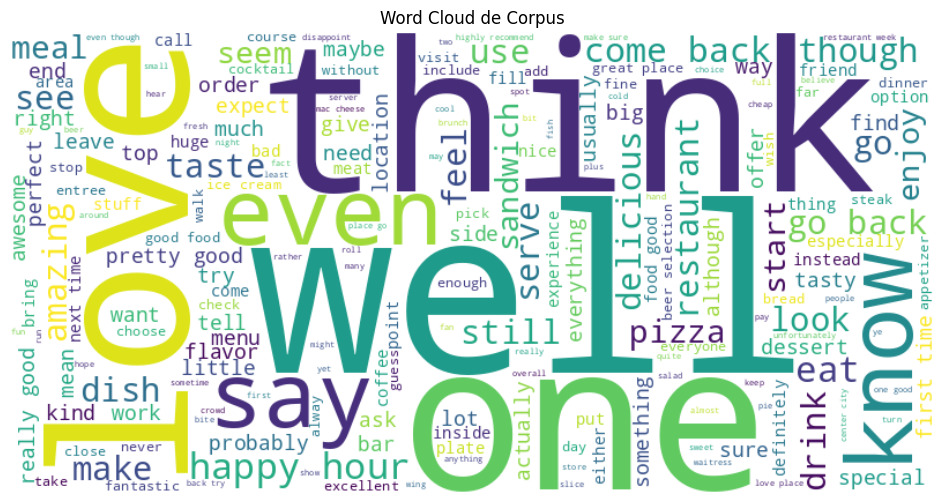

In [183]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplanar la lista de listas y unir palabras en un solo string
flat_words = [word for sublist in corpus["words"] for word in sublist]
text = " ".join(flat_words)

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Graficar el WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Word Cloud de Corpus")
plt.show()


In [184]:
corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word.strip()])

/tmp/ipykernel_532953/88290599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus["words"] = corpus["words"].apply(lambda sublist: [word for word in sublist if word.strip()])


In [185]:
corpus['words_join'] = None
corpus.loc[:, "words_join"] = corpus["words"].apply(lambda x: " ".join([word for word in x if word]))

/tmp/ipykernel_532953/1659496537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corpus['words_join'] = None


In [186]:
corpus

,review_id,user_id,business_id,stars_review,text,date,stars_business,review_count,words,words_join
30296,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,2022-01-19 18:33:21,4.0,33,"[really, come, ha, ha, great, store, always, b...",really come ha ha great store always bang fres...
278232,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,2022-01-19 17:51:51,4.0,541,"[pick, restaurant, go, restaurant, last, week,...",pick restaurant go restaurant last week could ...
178745,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,2022-01-19 16:04:45,2.5,387,"[restaurant, week, upon, decide, dine, since, ...",restaurant week upon decide dine since time lo...
262018,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,2022-01-19 14:45:47,3.5,9,"[tell, stop, come, remember, stock, bulk, wine...",tell stop come remember stock bulk wine much a...
90968,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,2022-01-19 13:55:12,4.0,119,"[love, place, whenever, come, staff, incredibl...",love place whenever come staff incredible serv...
...,...,...,...,...,...,...,...,...,...,...
54582,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,2005-09-25 15:53:53,3.5,331,"[would, give, star, food, service, outstanding...",would give star food service outstanding food ...
81582,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,2005-09-17 03:35:22,3.5,498,"[awesome, southern, comfort, food, heart, old,...",awesome southern comfort food heart old city m...
232060,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,2005-09-11 23:32:56,4.0,1176,"[great, place, near, market, outstanding, choi...",great place near market outstanding choice swe...
97516,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,2005-09-06 22:55:47,4.5,17,"[favorite, restaurant, elegant, opinion, serve...",favorite restaurant elegant opinion serve grea...


In [187]:
corpus=corpus.drop(columns=["date","review_count","stars_business"])

### Save cleaned corpus

In [188]:
corpus.to_csv('lemma.csv', index=False, encoding='utf-8')

## READ

In [189]:
import pandas as pd
corpus = pd.read_csv('lemma.csv', encoding='utf-8')

### VADER POLARITY

In [190]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus["text"])

print(X.shape)

(104899, 166640)


In [191]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [192]:
y_pred = []
for rev in corpus["text"]:
    y_pred.append(1 if analyzer.polarity_scores(rev)['compound'] > 0 else 0)

In [193]:
corpus["vader"]= y_pred
corpus["text"][corpus["vader"]==0]

14        this was probably the worst breakfast sandwich...
24        while the food is decent i have to mention the...
41        this place is trash literally one of the worst...
59        wanted to try a new spot during restaurant wee...
81        came here for brunch it was cold and rainy and...
                                ...                        
104816    chicken cheesesteaks with grilled onions and e...
104831    terrible food  the restaurant is terribly set ...
104837    atmosphere is nice but the selection isnt that...
104871    its a pretty big bar  we had drinks by the fir...
104873                             quite the beer selection
Name: text, Length: 9084, dtype: object

In [194]:
corpus

,review_id,user_id,business_id,stars_review,text,words,words_join,vader
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1
1,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,"['pick', 'restaurant', 'go', 'restaurant', 'la...",pick restaurant go restaurant last week could ...,1
2,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,"['restaurant', 'week', 'upon', 'decide', 'dine...",restaurant week upon decide dine since time lo...,1
3,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,"['tell', 'stop', 'come', 'remember', 'stock', ...",tell stop come remember stock bulk wine much a...,1
4,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,"['love', 'place', 'whenever', 'come', 'staff',...",love place whenever come staff incredible serv...,1
...,...,...,...,...,...,...,...,...
104894,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,"['would', 'give', 'star', 'food', 'service', '...",would give star food service outstanding food ...,1
104895,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,"['awesome', 'southern', 'comfort', 'food', 'he...",awesome southern comfort food heart old city m...,1
104896,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,"['great', 'place', 'near', 'market', 'outstand...",great place near market outstanding choice swe...,1
104897,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,"['favorite', 'restaurant', 'elegant', 'opinion...",favorite restaurant elegant opinion serve grea...,1


### adjectives only

In [195]:
import spacy
import pandas as pd
from tqdm import tqdm  # For progress bar

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Function to extract only adjectives from a text
def extract_adjectives(text):
    doc = nlp(text)  # Process the full text
    return [token.text for token in doc if token.pos_ == "ADJ"]

tqdm.pandas(desc="Extracting adjectives...")

# Apply the function with progress bar
corpus['adj'] = corpus['words'].progress_apply(extract_adjectives)

# Print the result
print(corpus)


Extracting adjectives...: 100%|██████████| 104899/104899 [33:37<00:00, 51.99it/s]

                     review_id                 user_id  \
0       YNCiK_ctwCbOouDB6drP5g  K1Z4CV1kCmvLYJnA30yfAw   
1       UwqKp6DMX5wPP2keslyR-A  DujXxxlIKTGEPso-C-Rq5A   
2       msWw5i0v02kNyy6p78k8_w  dt7hSz_Uh8-PdIlvefVwbQ   
3       hS5AsPCIJQ8znrfghGCdww  OExmdhEdcKHQQqXrv6ftTg   
4       FMTQ79v-GELtDR8hvQadBQ  JW5W4OZCohTvZlRF1jzrTg   
...                        ...                     ...   
104894  H2B0U2EM8TeJS00ST3FyDw  jTXj5uf5ER5siDnQK_y4aA   
104895  9IbyKwioF_3JffSQzqrATw  jTXj5uf5ER5siDnQK_y4aA   
104896  ODx9bcCcVZSurbp5oZdA3w  jTXj5uf5ER5siDnQK_y4aA   
104897  3zCltphj7eLLKrvFhsVlFQ  jTXj5uf5ER5siDnQK_y4aA   
104898  aCBMaG04reRS_ghk5il6Lw  jTXj5uf5ER5siDnQK_y4aA   

                   business_id  stars_review  \
0       E8l_XGabADbFzal1p_HMTA           5.0   
1       arKiXax3ScSM_z3O-0CIyw           5.0   
2       S0dQ8Vks0IR-PZPLoBHKRA           2.0   
3       2TeXhKB-GtjgbYlNO5GYoQ           4.0   
4       SruGlT3aLDyqDN3uDR2CMw           5.0   
...            

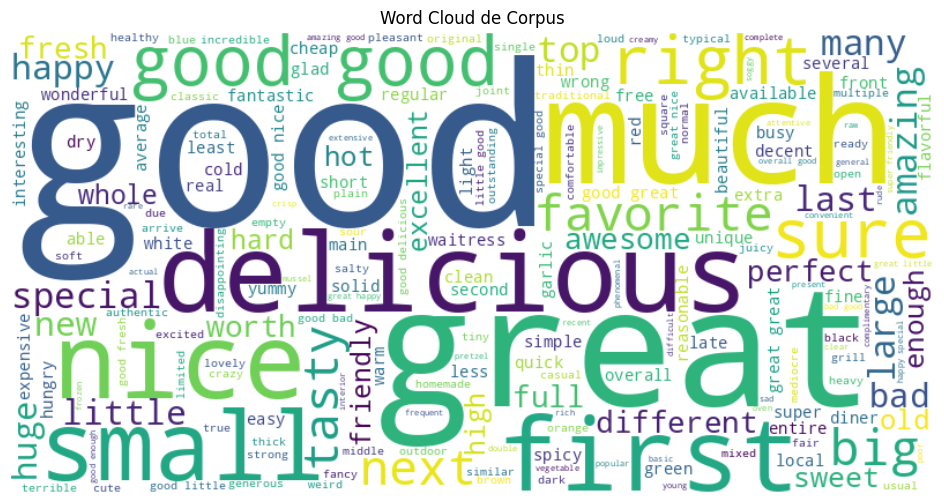

In [196]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Aplanar la lista de listas y unir palabras en un solo string
flat_words = [word for sublist in corpus["adj"] for word in sublist]
text = " ".join(flat_words)

# Crear el WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(text)

# Graficar el WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Ocultar ejes
plt.title("Word Cloud de Corpus")
plt.show()


In [197]:
irrelevant_words=["good"]
corpus["adj"] = corpus["adj"].apply(lambda sublist: [word for word in sublist if word not in irrelevant_words])

In [198]:
corpus['adj_join'] = None
corpus.loc[:, "adj_join"] = corpus["adj"].apply(lambda x: " ".join([word for word in x if word]))

In [199]:
corpus

,review_id,user_id,business_id,stars_review,text,words,words_join,vader,adj,adj_join
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1,"[great, fresh, delicious, fresh, ripe, soft, o...",great fresh delicious fresh ripe soft outer fa...
1,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,"['pick', 'restaurant', 'go', 'restaurant', 'la...",pick restaurant go restaurant last week could ...,1,"[last, asparagus, white, great, glad, able, wo...",last asparagus white great glad able wonderful
2,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,"['restaurant', 'week', 'upon', 'decide', 'dine...",restaurant week upon decide dine since time lo...,1,"[hostess, nice, nice, happy, nice, helpful, ha...",hostess nice nice happy nice helpful happy mul...
3,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,"['tell', 'stop', 'come', 'remember', 'stock', ...",tell stop come remember stock bulk wine much a...,1,"[much, affordable, fine, quick, cheap, great, ...",much affordable fine quick cheap great small f...
4,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,"['love', 'place', 'whenever', 'come', 'staff',...",love place whenever come staff incredible serv...,1,"[incredible, bad, delicious, nice, outdoor, sm...",incredible bad delicious nice outdoor small in...
...,...,...,...,...,...,...,...,...,...,...
104894,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,"['would', 'give', 'star', 'food', 'service', '...",would give star food service outstanding food ...,1,"[outstanding, fresh, excellent, great, main, g...",outstanding fresh excellent great main great r...
104895,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,"['awesome', 'southern', 'comfort', 'food', 'he...",awesome southern comfort food heart old city m...,1,"[awesome, southern, old, great, blue, excellen...",awesome southern old great blue excellent gree...
104896,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,"['great', 'place', 'near', 'market', 'outstand...",great place near market outstanding choice swe...,1,"[great, outstanding, sweet, large, hard, amazi...",great outstanding sweet large hard amazing inn...
104897,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,"['favorite', 'restaurant', 'elegant', 'opinion...",favorite restaurant elegant opinion serve grea...,1,"[favorite, elegant, great, romantic, handsome,...",favorite elegant great romantic handsome excel...


## LDA

In [200]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
num_batches = 7
batches = np.array_split(corpus, num_batches)


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [201]:
from collections import Counter

# Define helper functions
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [202]:
num_batches

7

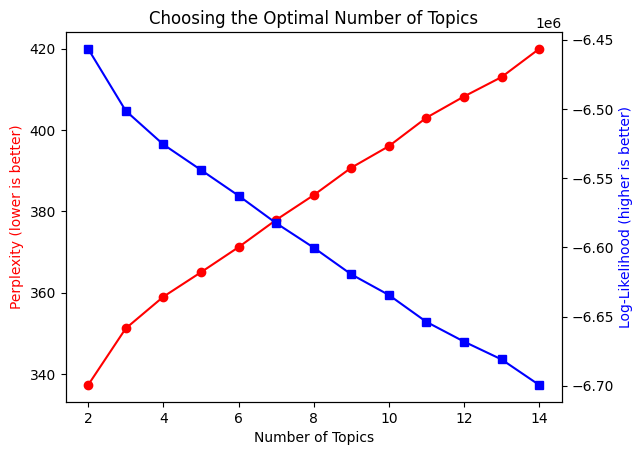

In [203]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

X = vectorizer.fit_transform(corpus["adj_join"])

# Try different numbers of topics and record scores
topic_range = range(2, 15)  # Test from 2 to 15 topics
perplexities = []
log_likelihoods = []

for n_topics in topic_range:
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda.fit(X)
    
    perplexities.append(lda.perplexity(X))  # Lower is better
    log_likelihoods.append(lda.score(X))   # Higher is better

# Plot results
fig, ax1 = plt.subplots()

ax1.plot(topic_range, perplexities, marker="o", color="red", label="Perplexity")
ax1.set_xlabel("Number of Topics")
ax1.set_ylabel("Perplexity (lower is better)", color="red")

ax2 = ax1.twinx()
ax2.plot(topic_range, log_likelihoods, marker="s", color="blue", label="Log-Likelihood")
ax2.set_ylabel("Log-Likelihood (higher is better)", color="blue")

plt.title("Choosing the Optimal Number of Topics")
plt.show()

In [204]:
corpus

,review_id,user_id,business_id,stars_review,text,words,words_join,vader,adj,adj_join
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1,"[great, fresh, delicious, fresh, ripe, soft, o...",great fresh delicious fresh ripe soft outer fa...
1,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,"['pick', 'restaurant', 'go', 'restaurant', 'la...",pick restaurant go restaurant last week could ...,1,"[last, asparagus, white, great, glad, able, wo...",last asparagus white great glad able wonderful
2,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,"['restaurant', 'week', 'upon', 'decide', 'dine...",restaurant week upon decide dine since time lo...,1,"[hostess, nice, nice, happy, nice, helpful, ha...",hostess nice nice happy nice helpful happy mul...
3,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,"['tell', 'stop', 'come', 'remember', 'stock', ...",tell stop come remember stock bulk wine much a...,1,"[much, affordable, fine, quick, cheap, great, ...",much affordable fine quick cheap great small f...
4,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,"['love', 'place', 'whenever', 'come', 'staff',...",love place whenever come staff incredible serv...,1,"[incredible, bad, delicious, nice, outdoor, sm...",incredible bad delicious nice outdoor small in...
...,...,...,...,...,...,...,...,...,...,...
104894,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,"['would', 'give', 'star', 'food', 'service', '...",would give star food service outstanding food ...,1,"[outstanding, fresh, excellent, great, main, g...",outstanding fresh excellent great main great r...
104895,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,"['awesome', 'southern', 'comfort', 'food', 'he...",awesome southern comfort food heart old city m...,1,"[awesome, southern, old, great, blue, excellen...",awesome southern old great blue excellent gree...
104896,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,"['great', 'place', 'near', 'market', 'outstand...",great place near market outstanding choice swe...,1,"[great, outstanding, sweet, large, hard, amazi...",great outstanding sweet large hard amazing inn...
104897,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,"['favorite', 'restaurant', 'elegant', 'opinion...",favorite restaurant elegant opinion serve grea...,1,"[favorite, elegant, great, romantic, handsome,...",favorite elegant great romantic handsome excel...


In [272]:

n_topics = 6
num_batches=1
batches = np.array_split(corpus, num_batches)


/home/jaume/Escritorio/Ultim_Semestre/Comp.ML/Practicas/venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [273]:
n_topics

6

In [274]:
# Define helper functions
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        print(temp_vector_sum)
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
        
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)  # Simply store the word as-is
        top_words.append(" ".join(topic_words))         
    return top_words

In [275]:
# Store topic distributions
all_topic_matrices = []

for batch_idx, batch in enumerate(batches):
    print(f"\nProcessing Batch {batch_idx+1}/{num_batches}...\n")
    
    # Feature extraction
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus["adj_join"].to_numpy())

    # LDA model
    lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
    lda_topic_matrix = lda_model.fit_transform(X)

    # Store the topic distributions
    all_topic_matrices.append(pd.DataFrame(lda_topic_matrix))

    # Get topic distribution (for visualization)
    lda_keys = get_keys(lda_topic_matrix)
    lda_categories, lda_counts = keys_to_counts(lda_keys)
    top_n_words_lda = get_top_n_words(20, lda_keys, X, vectorizer)

    # Print results
    for i in range(len(top_n_words_lda)):
        print(f"Topic {i+1}: {top_n_words_lda[i]}")

# Combine all topic matrices
df_topics = pd.concat(all_topic_matrices, ignore_index=True)



Processing Batch 1/1...

  (0, 4829)	1
  (0, 3053)	1
  (0, 1988)	1
  (0, 3848)	1
  (0, 631)	1
  (0, 2732)	1
  (0, 4160)	1
  (0, 4762)	1
  (0, 2538)	1
  (0, 1257)	1
  (0, 1262)	1
  (0, 4358)	1
  (0, 2575)	1
  (0, 1363)	1
  (0, 2249)	1
  (0, 949)	1
  (0, 3456)	1
  (0, 1038)	1
  (0, 2907)	1
  (0, 165)	1
  (0, 1490)	1
  (0, 1294)	1
  (0, 4970)	1
  (0, 965)	1
  (0, 822)	1
  :	:
  (0, 2318)	1
  (0, 2405)	1
  (0, 553)	1
  (0, 1304)	1
  (0, 571)	1
  (0, 580)	1
  (0, 2226)	1
  (0, 1655)	1
  (0, 1945)	1
  (0, 3674)	1
  (0, 4211)	1
  (0, 1907)	1
  (0, 2576)	1
  (0, 4027)	2
  (0, 788)	2
  (0, 3591)	1
  (0, 211)	1
  (0, 39)	1
  (0, 2216)	1
  (0, 3687)	2
  (0, 2952)	1
  (0, 975)	1
  (0, 2376)	1
  (0, 2976)	1
  (0, 3657)	1
  (0, 2528)	1
  (0, 3483)	1
  (0, 3816)	1
  (0, 4682)	1
  (0, 4129)	1
  (0, 419)	1
  (0, 2205)	1
  (0, 1009)	1
  (0, 2753)	1
  (0, 4059)	1
  (0, 1629)	1
  (0, 863)	1
  (0, 2276)	1
  (0, 4418)	1
  (0, 406)	1
  (0, 3826)	1
  (0, 3231)	1
  (0, 311)	1
  (0, 2341)	1
  (0, 2900)	1
  (0,

In [276]:
for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  hot cold great white bad garlic min horrible black several outdoor square hungry delicious nice much first big new sure
Topic 2:  much great nice little bad first small right sure many last decent big tasty enough large special new next worth
Topic 3:  great delicious nice little fresh small friendly sweet much perfect super favorite amazing first right top special hot spicy big
Topic 4:  great happy delicious amazing special favorite friendly awesome new many excellent first much tasty local nice last perfect worth huge
Topic 5:  average fine bad great real least little joint big next small solid sad nice enough much friendly tiny last lovely
Topic 6:  great solid sweet top green light beautiful little sour much tart dry orange favorite dirty delicious first last nice bad


In [277]:
from collections import Counter

# Asegurar que cada tópico es una lista de palabras
top_n_words_lda = [topic.split() for topic in top_n_words_lda]  # <- Agregar esta línea si necesario

# Contar palabras en todos los tópicos
word_counts = Counter(word for topic in top_n_words_lda for word in topic)

# Filtrar palabras que aparecen en más de un tópico
repeated_words = {word for word, count in word_counts.items() if count > 4}

# Crear una copia de top_n_words_lda sin palabras repetidas
filtered_top_n_words_lda = [
    [word for word in topic if word not in repeated_words]
    for topic in top_n_words_lda
]

# Mostrar palabras repetidas
print("Palabras repetidas en múltiples tópicos:", repeated_words)

# Mostrar los nuevos tópicos sin palabras repetidas
for i, topic in enumerate(filtered_top_n_words_lda, 1):
    print(f"Tópico {i}:", topic)


Palabras repetidas en múltiples tópicos: {'nice', 'much', 'great', 'first'}
Tópico 1: ['hot', 'cold', 'white', 'bad', 'garlic', 'min', 'horrible', 'black', 'several', 'outdoor', 'square', 'hungry', 'delicious', 'big', 'new', 'sure']
Tópico 2: ['little', 'bad', 'small', 'right', 'sure', 'many', 'last', 'decent', 'big', 'tasty', 'enough', 'large', 'special', 'new', 'next', 'worth']
Tópico 3: ['delicious', 'little', 'fresh', 'small', 'friendly', 'sweet', 'perfect', 'super', 'favorite', 'amazing', 'right', 'top', 'special', 'hot', 'spicy', 'big']
Tópico 4: ['happy', 'delicious', 'amazing', 'special', 'favorite', 'friendly', 'awesome', 'new', 'many', 'excellent', 'tasty', 'local', 'last', 'perfect', 'worth', 'huge']
Tópico 5: ['average', 'fine', 'bad', 'real', 'least', 'little', 'joint', 'big', 'next', 'small', 'solid', 'sad', 'enough', 'friendly', 'tiny', 'last', 'lovely']
Tópico 6: ['solid', 'sweet', 'top', 'green', 'light', 'beautiful', 'little', 'sour', 'tart', 'dry', 'orange', 'favorit

## Visualization

In [278]:
# add the topics to this dataset as 8 new columns
df_topics.columns = ['topic_{}'.format(i) for i in range(n_topics)]

# Combine with the original dataset
dataset_f = pd.concat([corpus, df_topics], axis=1)
dataset_f.head()


,review_id,user_id,business_id,stars_review,text,words,words_join,vader,adj,adj_join,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1,"[great, fresh, delicious, fresh, ripe, soft, o...",great fresh delicious fresh ripe soft outer fa...,0.009804,0.395978,0.399086,0.175523,0.009804,0.009805
1,UwqKp6DMX5wPP2keslyR-A,DujXxxlIKTGEPso-C-Rq5A,arKiXax3ScSM_z3O-0CIyw,5.0,my boyfriend picked this restaurant for us to ...,"['pick', 'restaurant', 'go', 'restaurant', 'la...",pick restaurant go restaurant last week could ...,1,"[last, asparagus, white, great, glad, able, wo...",last asparagus white great glad able wonderful,0.421649,0.021011,0.021240,0.494245,0.020999,0.020855
2,msWw5i0v02kNyy6p78k8_w,dt7hSz_Uh8-PdIlvefVwbQ,S0dQ8Vks0IR-PZPLoBHKRA,2.0,restaurant week was upon us so i decided to di...,"['restaurant', 'week', 'upon', 'decide', 'dine...",restaurant week upon decide dine since time lo...,1,"[hostess, nice, nice, happy, nice, helpful, ha...",hostess nice nice happy nice helpful happy mul...,0.005571,0.577439,0.319250,0.086602,0.005560,0.005578
3,hS5AsPCIJQ8znrfghGCdww,OExmdhEdcKHQQqXrv6ftTg,2TeXhKB-GtjgbYlNO5GYoQ,4.0,i told myself id stop coming here and remember...,"['tell', 'stop', 'come', 'remember', 'stock', ...",tell stop come remember stock bulk wine much a...,1,"[much, affordable, fine, quick, cheap, great, ...",much affordable fine quick cheap great small f...,0.009805,0.009849,0.780610,0.119593,0.070333,0.009811
4,FMTQ79v-GELtDR8hvQadBQ,JW5W4OZCohTvZlRF1jzrTg,SruGlT3aLDyqDN3uDR2CMw,5.0,love this place whenever i come here the staff...,"['love', 'place', 'whenever', 'come', 'staff',...",love place whenever come staff incredible serv...,1,"[incredible, bad, delicious, nice, outdoor, sm...",incredible bad delicious nice outdoor small in...,0.017046,0.438976,0.493813,0.016798,0.016701,0.016667


In [279]:
dataset_f.to_csv('topics.csv', index=False, encoding='utf-8')

In [280]:
type(corpus["words"])


pandas.core.series.Series

In [281]:
# Convertir a lista de listas
sentences = corpus["words"].tolist()
type(sentences)

list

In [282]:
def preprocess(sentence):
    # Remove punctuation
    sentence = ''.join([char for char in sentence if char not in string.punctuation])
    # Split into words
    words = sentence.split()
    return words

# Apply the preprocessing to your sentences
preprocessed_sentences = [preprocess(sentence) for sentence in sentences]


In [283]:
from gensim.models import Word2Vec

model = Word2Vec(preprocessed_sentences, 
                 vector_size=100,  # Dimensión de los embeddings
                 window=5,         # Contexto de palabras
                 min_count=2,      # Ignora palabras con menos de 2 apariciones
                 workers=4,        # Paralelización
                 sg=1)             # Skip-gram (sg=1) o CBOW (sg=0)

print(list(model.wv.index_to_key))  # Muestra algunas palabras del vocabulario


['good', 'get', 'place', 'food', 'go', 'order', 'like', 'great', 'come', 'time', 'one', 'really', 'well', 'make', 'try', 'would', 'also', 'back', 'pizza', 'service', 'love', 'drink', 'menu', 'beer', 'bar', 'cheese', 'nice', 'delicious', 'say', 'eat', 'think', 'little', 'pretty', 'take', 'restaurant', 'chicken', 'want', 'table', 'definitely', 'friend', 'could', 'fry', 'look', 'even', 'give', 'sandwich', 'price', 'night', 'wait', 'sauce', 'taste', 'always', 'much', 'know', 'thing', 'people', 'dish', 'small', 'first', 'two', 'salad', 'hour', 'see', 'bit', 'feel', 'meal', 'flavor', 'happy', 'friendly', 'find', 'enjoy', 'fresh', 'spot', 'way', 'day', 'never', 'still', 'dinner', 'lot', 'special', 'side', 'though', 'experience', 'serve', 'favorite', 'right', 'staff', 'ask', 'amazing', 'sit', 'star', 'around', 'everything', 'city', 'coffee', 'seem', 'lunch', 'need', 'selection', 'bread', 'bad', 'area', 'since', 'something', 'sweet', 'sure', 'option', 'big', 'meat', 'long', 'review', 'top', 'wo

In [400]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import random

def reduce_dimensions(model, num_dimensions=2, words=[]):
    vectors = []
    labels = []
    
    if not words:
        words = model.wv.index_to_key

    for word in words:
        vectors.append(model.wv[word])
        labels.append(word)

    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    tsne = TSNE(n_components=num_dimensions, random_state=0, perplexity=5)
    vectors = tsne.fit_transform(vectors)

    return vectors, labels

def plot_words_by_topic(vectors, labels, topics):
    plt.figure(figsize=(10, 8))

    # Crear una paleta de colores con suficientes colores únicos
    num_topics = len(topics)
    cmap = plt.cm.get_cmap("tab20", num_topics)  # Hasta 20 colores únicos

    topic_colors = {i: cmap(i) for i in range(num_topics)}

    word_to_topic = {}  # Diccionario para mapear palabra -> tópico
    for topic_idx, words in enumerate(topics):
        for word in words:
            word_to_topic[word] = topic_idx

    for i, label in enumerate(labels):
        x, y = vectors[i]
        topic_idx = word_to_topic.get(label, -1)
        color = topic_colors.get(topic_idx, "gray")  # Gris si el tópico no se encuentra
        plt.scatter(x, y, color=color, alpha=0.7)
        plt.text(x + 0.1, y + 0.1, label, fontsize=9, color=color)

    plt.xlabel("Dimensión 1")
    plt.ylabel("Dimensión 2")
    plt.title("Words-topics t-SNE")
    plt.show()



In [290]:
print(list(model.wv.index_to_key)[:20])  # Muestra algunas palabras del vocabulario


['good', 'get', 'place', 'food', 'go', 'order', 'like', 'great', 'come', 'time', 'one', 'really', 'well', 'make', 'try', 'would', 'also', 'back', 'pizza', 'service']


/tmp/ipykernel_532953/1733378539.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab20", num_topics)  # Hasta 20 colores únicos


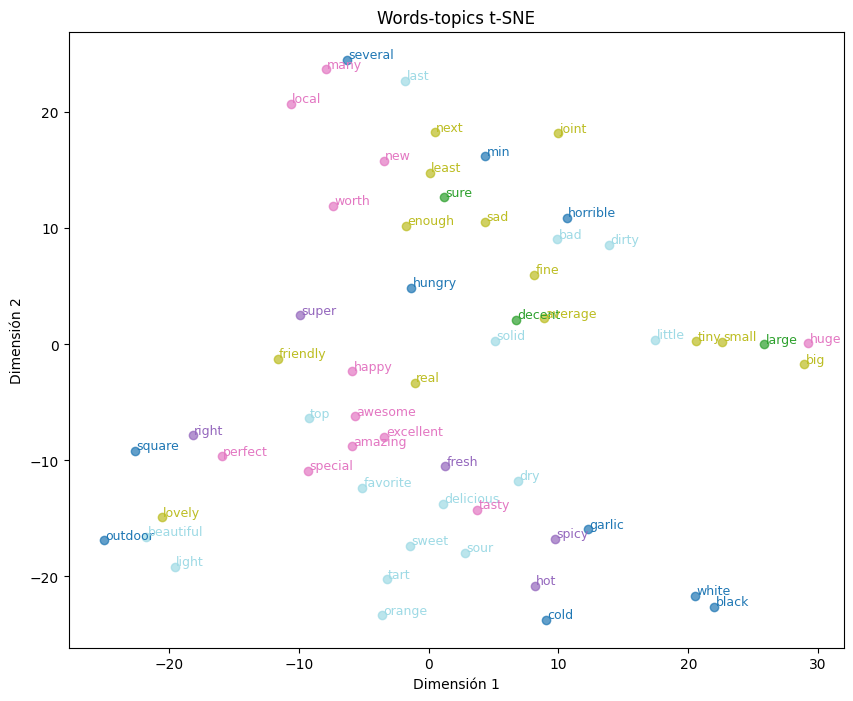

In [401]:
# Extraer palabras únicas de filtered_top_n_words_lda
words_to_plot = list(set(word for topic in filtered_top_n_words_lda for word in topic))
words_to_plot =[char for char in words_to_plot  if char != "green"]

# Reducir dimensionalidad
vectors_2d, labels = reduce_dimensions(model, num_dimensions=2, words=words_to_plot)

# Graficar con colores por tópico
plot_words_by_topic(vectors_2d, labels, filtered_top_n_words_lda)

## Agregate

In [379]:
dataset_f = pd.read_csv('topics.csv', encoding='utf-8')

In [380]:
dataset_f.columns

Index(['review_id', 'user_id', 'business_id', 'stars_review', 'text', 'words',
       'words_join', 'vader', 'adj', 'adj_join', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5'],
      dtype='object')

### Useful

In [381]:
reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

In [382]:
useful=reviews.drop(columns=[ 'user_id', 'business_id', 'stars', 'funny','cool', 'text', 'date'])

In [383]:
dataset_f=dataset_f.merge(useful, on="review_id", how="inner",)

In [384]:
dataset_f.columns

Index(['review_id', 'user_id', 'business_id', 'stars_review', 'text', 'words',
       'words_join', 'vader', 'adj', 'adj_join', 'topic_0', 'topic_1',
       'topic_2', 'topic_3', 'topic_4', 'topic_5', 'useful'],
      dtype='object')

In [385]:
import pandas as pd

# Assuming dataset_f is your DataFrame
# Function to adjust the topic values based on vader
def adjust_values(row):
    if row['vader'] == 0:
        # If vader is 0, multiply topic values by -1 to make them subtract
        return row[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']] * -1
    return row[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']]

# Apply the function to adjust the topic values based on vader
dataset_f[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']] = dataset_f.apply(adjust_values, axis=1)

# Now group by 'user_id' and sum the topic values
results = dataset_f.groupby('user_id')[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].sum()

# Multiply each topic column by the 'useful' column for each row
dataset_f_weighted = dataset_f[['business_id', 'useful', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].copy()

# Apply the weighting (multiplying the topic columns by the 'useful' column)
for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']:
    dataset_f_weighted[topic] = dataset_f_weighted[topic] * dataset_f_weighted['useful']

# Now, group by 'business_id' and sum the weighted topic columns
business_results = dataset_f_weighted.groupby('business_id')[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].sum()


merged_df = dataset_f.merge(results, on='user_id', suffixes=('_user', '_business'))

# Subtract the topic values for each review
for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']:
    merged_df[topic] = merged_df[f'{topic}_user'] - merged_df[f'{topic}_business']

# Drop the intermediate columns used for the merge (optional, for clarity)
merged_df.drop(columns=[f'{topic}_user' for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']] +
                  [f'{topic}_business' for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']], inplace=True)

# Display the final DataFrame
merged_df


,review_id,user_id,business_id,stars_review,text,words,words_join,vader,adj,adj_join,useful,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1,"['great', 'fresh', 'delicious', 'fresh', 'ripe...",great fresh delicious fresh ripe soft outer fa...,1,-1.352446,-2.549360,-10.034869,-5.009235,-1.813558,-1.240532
1,RtFgyyo4vrfvHeyrMdxlTg,K1Z4CV1kCmvLYJnA30yfAw,Zjg5nixJ-sTr9B6tsDzClw,5.0,absolute perfection byob and pure joy mr marti...,"['absolute', 'perfection', 'pure', 'joy', 'ins...",absolute perfection pure joy institution busin...,1,"['pure', 'rapid', 'single', 'perfect', 'white'...",pure rapid single perfect white red favorite b...,0,-1.269608,-2.932461,-10.211738,-4.694048,-1.733616,-1.158530
2,p7Ij2oh9pdy5u2FdSTyYXg,K1Z4CV1kCmvLYJnA30yfAw,at4y2FFxGBtSrZHYreNYCA,5.0,probably the best hoagie joint around we get h...,"['probably', 'good', 'joint', 'around', 'get',...",probably good joint around get weekend open ne...,1,"['joint', 'full']",joint full,1,-1.306695,-2.599873,-10.377596,-5.129202,-1.391990,-1.194643
3,3hcm34A5eRGMvonUPoLddw,K1Z4CV1kCmvLYJnA30yfAw,VSIUiDAMrrQVsfbLfquo2w,5.0,super solid pastries sold here if youre lookin...,"['super', 'solid', 'pastry', 'sell', 'look', '...",super solid pastry sell look satisfy sweet too...,1,"['super', ""'"", 'solid', 'sweet', 'ordinary', '...",super ' solid sweet ordinary extraordinary hap...,2,-1.341417,-2.674454,-9.967931,-4.984677,-1.802375,-1.229147
4,CAbVpMMfAEu0y5rjzFFVsA,K1Z4CV1kCmvLYJnA30yfAw,U7HYUH8SqZO6OQMNKCr5kQ,5.0,holy bajesus this place is great mooooove over...,"['holy', 'place', 'great', 'old', 'school', 'c...",holy place great old school classic pork sandw...,1,"['holy', 'great', 'old', 'classic', 'new', 'ol...",holy great old classic new old classic inventi...,0,-1.324840,-2.894450,-9.725636,-5.050879,-1.758641,-1.245554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104894,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,"['would', 'give', 'star', 'food', 'service', '...",would give star food service outstanding food ...,1,"['outstanding', 'fresh', 'excellent', 'great',...",outstanding fresh excellent great main great r...,0,-1.498448,-1.862448,-8.190334,-2.838824,-1.477935,-1.132011
104895,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,"['awesome', 'southern', 'comfort', 'food', 'he...",awesome southern comfort food heart old city m...,1,"['awesome', 'southern', 'old', 'great', 'blue'...",awesome southern old great blue excellent gree...,0,-1.597663,-1.845155,-8.253513,-2.653066,-1.525045,-1.125558
104896,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,"['great', 'place', 'near', 'market', 'outstand...",great place near market outstanding choice swe...,1,"['great', 'outstanding', 'sweet', 'large', 'ha...",great outstanding sweet large hard amazing inn...,0,-1.598954,-1.831456,-8.181784,-2.819977,-1.440973,-1.126856
104897,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,"['favorite', 'restaurant', 'elegant', 'opinion...",favorite restaurant elegant opinion serve grea...,1,"['favorite', 'elegant', 'great', 'romantic', '...",favorite elegant great romantic handsome excel...,2,-1.592009,-1.951575,-8.675283,-2.392861,-1.368614,-1.019659


In [386]:
import pandas as pd

# Multiply each topic column by the 'useful' column for each row
dataset_f_weighted = dataset_f[['business_id', 'useful', 'topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].copy()

# Apply the weighting (multiplying the topic columns by the 'useful' column)
for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']:
    dataset_f_weighted[topic] = dataset_f_weighted[topic] * dataset_f_weighted['useful']

# Now, group by 'business_id' and sum the weighted topic columns
business_results = dataset_f_weighted.groupby('business_id')[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].sum()


merged_df = dataset_f.merge(results, on='user_id', suffixes=('_user', '_business'))

# Subtract the topic values for each review
for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']:
    merged_df[topic] = merged_df[f'{topic}_user'] - merged_df[f'{topic}_business']

# Drop the intermediate columns used for the merge (optional, for clarity)
merged_df.drop(columns=[f'{topic}_user' for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']] +
                  [f'{topic}_business' for topic in ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']], inplace=True)

# Display the final DataFrame
merged_df


,review_id,user_id,business_id,stars_review,text,words,words_join,vader,adj,adj_join,useful,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,YNCiK_ctwCbOouDB6drP5g,K1Z4CV1kCmvLYJnA30yfAw,E8l_XGabADbFzal1p_HMTA,5.0,i really just come for the sushi ha ha but thi...,"['really', 'come', 'ha', 'ha', 'great', 'store...",really come ha ha great store always bang fres...,1,"['great', 'fresh', 'delicious', 'fresh', 'ripe...",great fresh delicious fresh ripe soft outer fa...,1,-1.352446,-2.549360,-10.034869,-5.009235,-1.813558,-1.240532
1,RtFgyyo4vrfvHeyrMdxlTg,K1Z4CV1kCmvLYJnA30yfAw,Zjg5nixJ-sTr9B6tsDzClw,5.0,absolute perfection byob and pure joy mr marti...,"['absolute', 'perfection', 'pure', 'joy', 'ins...",absolute perfection pure joy institution busin...,1,"['pure', 'rapid', 'single', 'perfect', 'white'...",pure rapid single perfect white red favorite b...,0,-1.269608,-2.932461,-10.211738,-4.694048,-1.733616,-1.158530
2,p7Ij2oh9pdy5u2FdSTyYXg,K1Z4CV1kCmvLYJnA30yfAw,at4y2FFxGBtSrZHYreNYCA,5.0,probably the best hoagie joint around we get h...,"['probably', 'good', 'joint', 'around', 'get',...",probably good joint around get weekend open ne...,1,"['joint', 'full']",joint full,1,-1.306695,-2.599873,-10.377596,-5.129202,-1.391990,-1.194643
3,3hcm34A5eRGMvonUPoLddw,K1Z4CV1kCmvLYJnA30yfAw,VSIUiDAMrrQVsfbLfquo2w,5.0,super solid pastries sold here if youre lookin...,"['super', 'solid', 'pastry', 'sell', 'look', '...",super solid pastry sell look satisfy sweet too...,1,"['super', ""'"", 'solid', 'sweet', 'ordinary', '...",super ' solid sweet ordinary extraordinary hap...,2,-1.341417,-2.674454,-9.967931,-4.984677,-1.802375,-1.229147
4,CAbVpMMfAEu0y5rjzFFVsA,K1Z4CV1kCmvLYJnA30yfAw,U7HYUH8SqZO6OQMNKCr5kQ,5.0,holy bajesus this place is great mooooove over...,"['holy', 'place', 'great', 'old', 'school', 'c...",holy place great old school classic pork sandw...,1,"['holy', 'great', 'old', 'classic', 'new', 'ol...",holy great old classic new old classic inventi...,0,-1.324840,-2.894450,-9.725636,-5.050879,-1.758641,-1.245554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104894,H2B0U2EM8TeJS00ST3FyDw,jTXj5uf5ER5siDnQK_y4aA,9_B5sCqKBOKDAmYpByiFFg,3.0,i would give it stars for the food and for t...,"['would', 'give', 'star', 'food', 'service', '...",would give star food service outstanding food ...,1,"['outstanding', 'fresh', 'excellent', 'great',...",outstanding fresh excellent great main great r...,0,-1.498448,-1.862448,-8.190334,-2.838824,-1.477935,-1.132011
104895,9IbyKwioF_3JffSQzqrATw,jTXj5uf5ER5siDnQK_y4aA,h7n599RGtvFLmLycugT2MQ,5.0,awesome southern comfort food in the heart of ...,"['awesome', 'southern', 'comfort', 'food', 'he...",awesome southern comfort food heart old city m...,1,"['awesome', 'southern', 'old', 'great', 'blue'...",awesome southern old great blue excellent gree...,0,-1.597663,-1.845155,-8.253513,-2.653066,-1.525045,-1.125558
104896,ODx9bcCcVZSurbp5oZdA3w,jTXj5uf5ER5siDnQK_y4aA,K3RURR9lIEE4JjOaPt99zg,4.0,great breakfastbrunch place near the italian m...,"['great', 'place', 'near', 'market', 'outstand...",great place near market outstanding choice swe...,1,"['great', 'outstanding', 'sweet', 'large', 'ha...",great outstanding sweet large hard amazing inn...,0,-1.598954,-1.831456,-8.181784,-2.819977,-1.440973,-1.126856
104897,3zCltphj7eLLKrvFhsVlFQ,jTXj5uf5ER5siDnQK_y4aA,c6NQy_kMo031AE2k5IPT4Q,5.0,my favorite of the starr restaurants this is t...,"['favorite', 'restaurant', 'elegant', 'opinion...",favorite restaurant elegant opinion serve grea...,1,"['favorite', 'elegant', 'great', 'romantic', '...",favorite elegant great romantic handsome excel...,2,-1.592009,-1.951575,-8.675283,-2.392861,-1.368614,-1.019659


In [387]:
merged_df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_review', 'text', 'words',
       'words_join', 'vader', 'adj', 'adj_join', 'useful', 'topic_0',
       'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5'],
      dtype='object')

In [388]:
traindataset=merged_df.drop(columns=['review_id', 'user_id', 'business_id','text', 'words', 'words_join','adj', 'adj_join', ])

In [389]:
traindataset=traindataset.rename(columns={'stars_review': 'y'}, inplace=False)


## TRAINING

In [395]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'traindataset' is your DataFrame
# Step 1: Split into X and y
X = traindataset[['vader','topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']]
y = traindataset['y']

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the features (X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 4: Train a Random Forest Regression model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

# Step 5: Make predictions on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Step 6: Evaluate the model (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Step 3: Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error: 0.9743426150329542
Mean Absolute Error (MAE): 0.7741755655423911


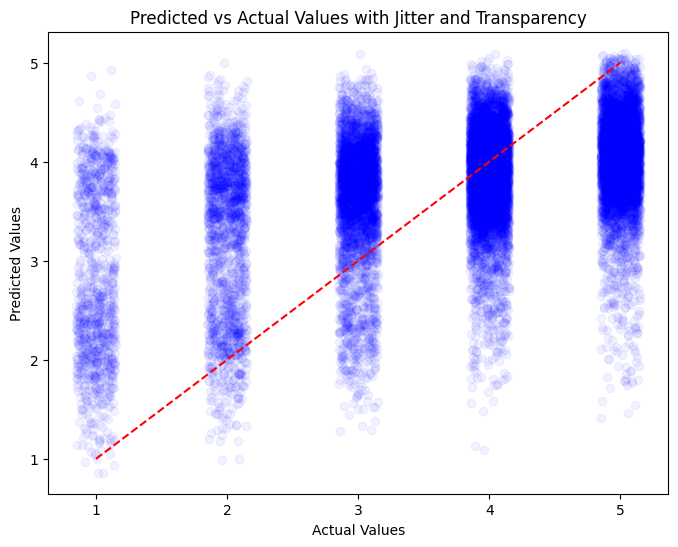

In [396]:
import numpy as np
import matplotlib.pyplot as plt

# Apply jitter to predicted and actual values to reduce overlap
jitter_strength = 0.15  # Adjust this to increase/decrease jitter
y_test_jittered = y_test + np.random.uniform(-jitter_strength, jitter_strength, len(y_test))
y_pred_jittered = y_pred + np.random.uniform(-jitter_strength, jitter_strength, len(y_pred))

# Plot predicted vs actual values with alpha transparency and jitter
plt.figure(figsize=(8, 6))
plt.scatter(y_test_jittered, y_pred_jittered, alpha=0.05, color='blue')  # Apply alpha transparency
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values with Jitter and Transparency')

# Show plot
plt.show()


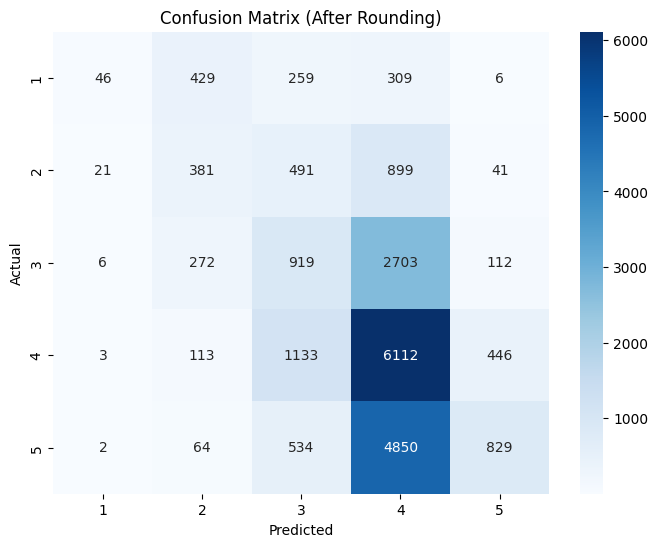

In [397]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Round the predicted values to make them discrete
y_pred_rounded = y_pred.round()

# Step 2: Confusion Matrix (after rounding)
cm = confusion_matrix(y_test, y_pred_rounded)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(int(min(y_test)), int(max(y_test)) + 1)],
            yticklabels=[str(i) for i in range(int(min(y_test)), int(max(y_test)) + 1)])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (After Rounding)')
plt.show()


